# Importing required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import IPython.display as ipd
import os
import sys
import subprocess
import numpy as np
import glob
import json
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display

import seaborn as sns
sns.set_palette(sns.color_palette("GnBu_r"))
import matplotlib.pyplot as plt
from IPython import display

# Accessing and Extracting the data stored in google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
coswara_data_dir ='/content/drive/MyDrive/Datasets/coswara/'
extracted_data_dir = '/content/Extracted_data'

if not os.path.exists(coswara_data_dir):
    print("Check the Coswara dataset directory!")

if not os.path.exists(extracted_data_dir):
    os.makedirs(extracted_data_dir)
dirs_extracted = set(map(os.path.basename,glob.glob('{}/202*'.format(extracted_data_dir))))
dirs_all = set(map(os.path.basename,glob.glob('{}/202*'.format(coswara_data_dir))))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for d in dirs_all:
    p = subprocess.Popen('cat {}/{}/*.tar.gz.* |tar -xvz -C {}/'.format(coswara_data_dir, d, extracted_data_dir), shell=True)
    #p = subprocess.Popen('cat {}/{}/*.tar.gz.* |tar -xvz -C {}/'.format(coswara_data_dir, d, extracted_data_dir), shell=True)
    p.wait()


    print("Extraction process complete!")

Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction process complete!
Extraction pro

#  EDA

In [ ]:
combined = pd.read_csv('/content/drive/MyDrive/Datasets/coswara/combined_data.csv')
combined.head()

,id,a,covid_status,record_date,ep,g,l_c,l_l,l_s,rU,...,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,2020-04-23,y,male,India,Anantapur,Andhra Pradesh,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,2020-04-20,y,male,India,BENGALURU URBAN,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,2020-04-24,y,female,United States,Pittsburgh,Pennsylvania,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,2020-04-23,y,male,India,Bangalore,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,2020-04-22,y,male,India,Nalanda,Bihar,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
init_path = './Extracted_data/'
end_path = '/cough-shallow.wav'
combined['source'] = init_path + combined['record_date'] + '/' + combined['id'] + end_path
combined.source

0       ./Extracted_data/2020-04-23/iV3Db6t1T8b7c5HQY2...
1       ./Extracted_data/2020-04-20/AxuYWBN0jFVLINCBqI...
2       ./Extracted_data/2020-04-24/C5eIsssb9GSkaAgIfs...
3       ./Extracted_data/2020-04-23/YjbEAECMBIaZKyfqOv...
4       ./Extracted_data/2020-04-22/aGOvk4ji0cVqIzCs1j...
                              ...                        
2369    ./Extracted_data/2021-07-13/333NjqA1TfZJuICEdX...
2370    ./Extracted_data/2021-07-06/dpA0EeRrtJUeKJjEuf...
2371    ./Extracted_data/2021-07-13/UXhG3vgoxkWtd4Meky...
2372    ./Extracted_data/2021-07-01/A5KW9PXraNgckln1gn...
2373    ./Extracted_data/2021-07-06/iYwmYc9CdlSuzqGwIl...
Name: source, Length: 2374, dtype: object

In [ ]:
combined.covid_status.value_counts()

healthy                        1404
positive_mild                   325
no_resp_illness_exposed         192
resp_illness_not_identified     153
positive_moderate               127
recovered_full                  103
positive_asymp                   70
Name: covid_status, dtype: int64

In [ ]:
new_df = combined[combined.covid_status != 'positive_mild']
new_df = new_df[new_df.covid_status != 'no_resp_illness_exposed']
new_df = new_df[new_df.covid_status != 'resp_illness_not_identified']

new_df = new_df[new_df.covid_status != 'recovered_full']
new_df = new_df[new_df.covid_status != 'positive_asymp']
new_df.covid_status.value_counts()

healthy              1404
positive_moderate     127
Name: covid_status, dtype: int64

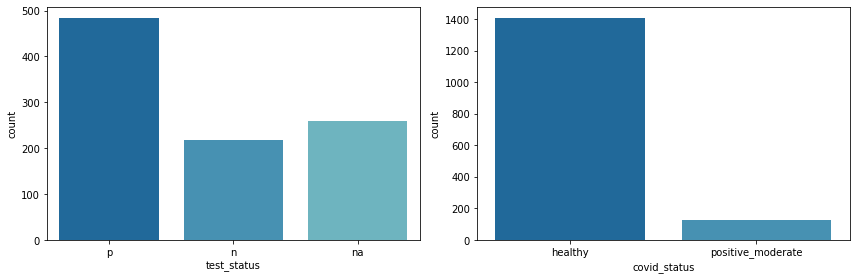

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=combined, x="test_status", ax=axs[0])
sns.countplot(data=new_df, x="covid_status", ax=axs[1])
f.tight_layout()

In [ ]:
test_result_csv = new_df.loc[combined.test_status!='na']
test_result_csv
cleaned_data = test_result_csv.drop(['test_date', 'l_l', 'l_c', 'l_s', 'ep'], axis=1)
cleaned_data

,id,a,covid_status,record_date,g,rU,smoker,cold,ht,diabetes,...,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia,source
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,2020-04-23,male,n,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./Extracted_data/2020-04-23/iV3Db6t1T8b7c5HQY2...
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,2020-04-20,male,n,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./Extracted_data/2020-04-20/AxuYWBN0jFVLINCBqI...
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,2020-04-24,female,n,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./Extracted_data/2020-04-24/C5eIsssb9GSkaAgIfs...
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,2020-04-23,male,n,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./Extracted_data/2020-04-23/YjbEAECMBIaZKyfqOv...
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,2020-04-22,male,n,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./Extracted_data/2020-04-22/aGOvk4ji0cVqIzCs1j...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,eAH6zemkWAfsP96K8tMyZJIDvgR2,23,positive_moderate,2021-07-01,female,n,n,True,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,./Extracted_data/2021-07-01/eAH6zemkWAfsP96K8t...
2359,gGgG540lBOZoSK1vyqNVlqBzQBl1,20,healthy,2021-07-12,male,n,n,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./Extracted_data/2021-07-12/gGgG540lBOZoSK1vyq...
2361,nx6RCgD0OjdzLa07UHBdHfz54ML2,24,healthy,2021-07-13,female,n,n,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./Extracted_data/2021-07-13/nx6RCgD0OjdzLa07UH...
2365,Ft82dZ2O4PMuq64dPIEVik9upMr2,41,positive_moderate,2021-07-03,male,n,n,True,NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,./Extracted_data/2021-07-03/Ft82dZ2O4PMuq64dPI...


In [ ]:
paths_lis = cleaned_data.id.unique()
wav_paths1 = []
for i in range(len(paths_lis)):
  for f in glob.glob("./Extracted_data/*/"+paths_lis[i]+"/cough-heavy.wav"):
    print(f)
    wav_paths1.append(f)

./Extracted_data/20200424/iV3Db6t1T8b7c5HQY2TwxIhjbzD3/cough-heavy.wav
./Extracted_data/20200424/AxuYWBN0jFVLINCBqIW5aZmGCdu1/cough-heavy.wav
./Extracted_data/20200424/C5eIsssb9GSkaAgIfsHMHeR6fSh1/cough-heavy.wav
./Extracted_data/20200424/YjbEAECMBIaZKyfqOvWy5DDImUb2/cough-heavy.wav
./Extracted_data/20200424/aGOvk4ji0cVqIzCs1jHnzlw2UEy2/cough-heavy.wav
./Extracted_data/20200424/rB5oGtrGYZR5uJUXEaDYrrredz13/cough-heavy.wav
./Extracted_data/20200424/OW5RTM4WXPawz0QLpsfjsl4FqM22/cough-heavy.wav
./Extracted_data/20200424/lF4uHVWCoBPlnxvapmUJ4ROtYV73/cough-heavy.wav
./Extracted_data/20200424/LYJToDRYDZfpjBuNC6YkUcphr0q1/cough-heavy.wav
./Extracted_data/20200424/pOZwqBg4NsVYWASmwwhXFq4UlpC2/cough-heavy.wav
./Extracted_data/20200424/aB7zSIAFW7bCmQC7IBUWFjNncTF3/cough-heavy.wav
./Extracted_data/20200424/GzhrTQhWHSTwvweRKx2x1Uh4wx52/cough-heavy.wav
./Extracted_data/20200424/OTSzQ3koIrTIdjRbfrDBzn88rLe2/cough-heavy.wav
./Extracted_data/20200424/Q2rqPfhdilf16SbycBrtJ4gQ5Ep1/cough-heavy.wav
./Extr

In [ ]:
cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data['wav1_path'] = pd.DataFrame(wav_paths1, index=None)
# cleaned_data['wav2_path'] = pd.DataFrame(wav_paths2, index=None)

final_csv = cleaned_data.reindex(columns=['id', 'wav1_path', 'a', 'covid_status', 'dT', 'fV', 'g', 'rU', 'test_status', 'um',
       'cough', 'cold', 'fever', 'loss_of_smell', 'diabetes', 'st', 'bd', 'ht',
       'pneumonia', 'mp', 'ftg', 'smoker', 'ctScan', 'vacc', 'testType', 'ihd',
       'asthma', 'others_preexist', 'ctDate', 'ctScore', 'diarrhoea', 'cld',
       'others_resp'])

final_csv = final_csv.filter(items=['id','wav1_path','covid_status'])
final_csv

,id,wav1_path,covid_status
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,./Extracted_data/20200424/iV3Db6t1T8b7c5HQY2Tw...,healthy
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,./Extracted_data/20200424/AxuYWBN0jFVLINCBqIW5...,healthy
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,./Extracted_data/20200424/C5eIsssb9GSkaAgIfsHM...,healthy
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,./Extracted_data/20200424/YjbEAECMBIaZKyfqOvWy...,healthy
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,./Extracted_data/20200424/aGOvk4ji0cVqIzCs1jHn...,healthy
...,...,...,...
1345,eAH6zemkWAfsP96K8tMyZJIDvgR2,./Extracted_data/20210714/eAH6zemkWAfsP96K8tMy...,positive_moderate
1346,gGgG540lBOZoSK1vyqNVlqBzQBl1,./Extracted_data/20210714/gGgG540lBOZoSK1vyqNV...,healthy
1347,nx6RCgD0OjdzLa07UHBdHfz54ML2,./Extracted_data/20210714/nx6RCgD0OjdzLa07UHBd...,healthy
1348,Ft82dZ2O4PMuq64dPIEVik9upMr2,./Extracted_data/20210714/Ft82dZ2O4PMuq64dPIEV...,positive_moderate


In [ ]:
healthy_audio_coswara, fs = librosa.load(final_csv.wav1_path[0], mono=True)

(-8843.5, 185713.5, -0.7307213008403778, 0.8006345689296722)

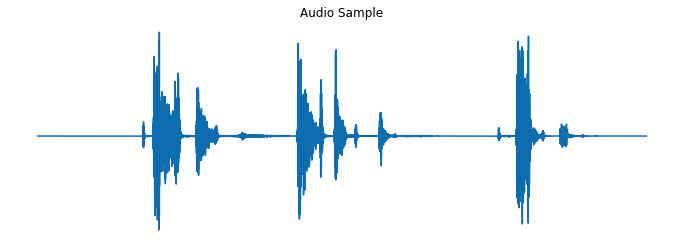

In [ ]:

fig = plt.figure(figsize=(12,4))
plt.plot(healthy_audio_coswara)
plt.title("Audio Sample")
plt.axis('off')

In [ ]:
final_csv = final_csv.drop(64)
final_csv = final_csv.drop(106)
final_csv = final_csv.drop(107)
final_csv = final_csv.drop(108)
final_csv = final_csv.drop(178)
final_csv = final_csv.drop(477)
final_csv = final_csv.drop(503)
final_csv = final_csv.drop(581)
final_csv = final_csv.drop(657)
final_csv = final_csv.drop(658)
final_csv = final_csv.drop(688)
final_csv = final_csv.drop(814)
final_csv = final_csv.drop(815)
final_csv = final_csv.drop(876)
final_csv = final_csv.drop(913)
final_csv = final_csv.drop(982)
final_csv = final_csv.drop(1008)
final_csv = final_csv.drop(1014)
final_csv = final_csv.drop(1026)
final_csv = final_csv.drop(1031)
final_csv = final_csv.drop(1051)
final_csv = final_csv.drop(1086)
final_csv = final_csv.drop(479)
final_csv = final_csv.drop(1204)
final_csv = final_csv.drop(1207)
final_csv = final_csv.drop(1209)
final_csv = final_csv.drop(1214)
final_csv = final_csv.drop(1096)
final_csv = final_csv.drop(1256)

In [ ]:
final_csv.covid_status.value_counts()

healthy              1194
positive_moderate     127
Name: covid_status, dtype: int64

In [ ]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(final_csv.iterrows()):
    print(index_num)
    file_name = final_csv.wav1_path[index_num]
    final_class_labels=row["covid_status"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1it [00:00,  5.63it/s]

0
1


3it [00:00,  5.39it/s]

2
3


5it [00:00,  5.86it/s]

4
5


7it [00:01,  8.22it/s]

6
7


9it [00:01,  7.69it/s]

8
9


11it [00:01,  8.58it/s]

10
11


13it [00:01,  8.89it/s]

12
13


15it [00:01,  8.19it/s]

14
15


16it [00:02,  7.96it/s]

16
17


19it [00:02,  8.46it/s]

18
19


21it [00:02,  7.67it/s]

20
21


23it [00:03,  7.31it/s]

22
23


25it [00:03,  7.28it/s]

24
25


27it [00:03,  7.52it/s]

26
27


30it [00:03,  7.63it/s]

28
29


31it [00:04,  7.67it/s]

30
31


34it [00:04,  8.90it/s]

32
33
34


36it [00:04,  8.78it/s]

35
36


38it [00:04,  9.16it/s]

37
38


41it [00:05,  8.84it/s]

39
40
41

42it [00:05,  8.49it/s]


42


45it [00:05, 10.24it/s]

43
44
45


47it [00:05,  9.35it/s]

46
47


49it [00:06,  9.11it/s]

48
49


51it [00:06,  8.96it/s]

50
51


53it [00:06,  9.41it/s]

52
53


56it [00:06,  9.64it/s]

54
55
56


58it [00:07,  9.40it/s]

57
58
59

60it [00:07,  9.13it/s]


60


63it [00:07,  9.77it/s]

61
62
63


65it [00:07,  8.98it/s]

65
66


67it [00:08,  8.86it/s]

67
68


69it [00:08,  8.33it/s]

69
70


71it [00:08,  8.46it/s]

71
72


73it [00:08,  7.63it/s]

73
74


75it [00:09,  7.20it/s]

75
76


77it [00:09,  6.91it/s]

77
78


79it [00:09,  7.09it/s]

79
80


81it [00:09,  9.29it/s]

81
82


83it [00:10,  7.79it/s]

83
84


84it [00:10,  7.53it/s]

85
86


87it [00:10,  7.99it/s]

87
88
89


90it [00:11,  8.08it/s]

90
91


92it [00:11,  8.30it/s]

92
93


94it [00:11,  8.32it/s]

94
95


96it [00:11,  8.20it/s]

96
97


98it [00:12,  6.73it/s]

98
99


102it [00:12, 10.12it/s]

100
101
102
103


104it [00:12,  9.97it/s]

104
105
109


107it [00:13,  8.29it/s]

110
111


109it [00:13,  7.93it/s]

112
113
114


112it [00:13,  8.89it/s]

115
116


115it [00:13,  9.27it/s]

117
118
119


117it [00:14,  8.50it/s]

120
121


120it [00:14,  9.10it/s]

122
123
124


122it [00:14,  7.57it/s]

125
126


124it [00:15,  7.59it/s]

127
128


126it [00:15,  8.24it/s]

129
130


128it [00:15,  7.57it/s]

131
132


130it [00:15,  7.12it/s]

133
134


133it [00:16,  9.33it/s]

135
136
137


135it [00:16,  7.55it/s]

138
139


137it [00:16,  8.58it/s]

140
141


139it [00:17,  7.74it/s]

142
143


141it [00:17,  8.19it/s]

144
145


143it [00:17,  7.81it/s]

146
147


145it [00:17,  7.92it/s]

148
149


147it [00:18,  7.66it/s]

150
151


149it [00:18,  7.55it/s]

152
153


151it [00:18,  8.18it/s]

154
155


153it [00:18,  8.02it/s]

156
157


155it [00:19,  7.64it/s]

158
159


157it [00:19,  6.68it/s]

160
161


159it [00:19,  7.72it/s]

162
163


161it [00:19,  8.09it/s]

164
165


163it [00:20,  7.32it/s]

166
167


165it [00:20,  7.02it/s]

168
169


167it [00:20,  6.71it/s]

170
171


169it [00:20,  7.42it/s]

172
173


172it [00:21,  8.74it/s]

174
175
176


175it [00:21,  9.30it/s]

177
179
180


178it [00:21,  8.84it/s]

181
182
183


180it [00:22,  7.39it/s]

184
185


182it [00:22,  7.18it/s]

186
187


185it [00:22,  8.39it/s]

188
189
190


187it [00:23,  9.07it/s]

191
192


189it [00:23,  8.94it/s]

193
194


190it [00:23,  8.47it/s]

195
196


193it [00:23,  8.40it/s]

197
198


195it [00:24,  7.39it/s]

199
200


197it [00:24,  7.11it/s]

201
202


199it [00:24,  6.96it/s]

203
204


201it [00:25,  7.08it/s]

205
206


203it [00:25,  7.79it/s]

207
208


205it [00:25,  8.18it/s]

209
210


207it [00:25,  7.13it/s]

211
212


209it [00:26,  7.72it/s]

213
214


211it [00:26,  7.19it/s]

215
216


213it [00:26,  7.36it/s]

217
218


215it [00:26,  7.04it/s]

219
220


217it [00:27,  6.97it/s]

221
222


219it [00:27,  6.68it/s]

223
224


221it [00:27,  6.86it/s]

225
226


223it [00:28,  6.21it/s]

227
228


225it [00:28,  7.26it/s]

229
230


227it [00:28,  7.88it/s]

231
232


229it [00:28,  7.72it/s]

233
234


231it [00:29,  8.33it/s]

235
236


232it [00:29,  8.45it/s]

237
238


234it [00:29,  8.78it/s]

239


236it [00:29,  7.39it/s]

240
241


238it [00:30,  7.14it/s]

242
243


240it [00:30,  6.68it/s]

244
245


242it [00:30,  8.19it/s]

246
247


244it [00:30,  7.30it/s]

248
249


246it [00:31,  7.22it/s]

250
251


248it [00:31,  7.15it/s]

252
253


250it [00:31,  6.63it/s]

254
255
256


253it [00:32,  5.26it/s]

257
258


255it [00:32,  5.41it/s]

259
260


257it [00:33,  6.15it/s]

261
262


258it [00:33,  6.26it/s]

263
264


261it [00:33,  7.03it/s]

265
266


263it [00:33,  7.60it/s]

267
268


265it [00:34,  6.69it/s]

269
270


267it [00:34,  7.38it/s]

271
272


269it [00:34,  7.29it/s]

273
274


271it [00:34,  6.92it/s]

275
276


273it [00:35,  6.88it/s]

277
278


275it [00:35,  7.02it/s]

279
280


277it [00:35,  8.28it/s]

281
282


279it [00:35,  7.85it/s]

283
284


281it [00:36,  7.70it/s]

285
286


283it [00:36,  7.36it/s]

287
288


285it [00:36,  6.70it/s]

289
290


287it [00:37,  7.29it/s]

291
292


289it [00:37,  7.70it/s]

293
294


292it [00:37,  8.31it/s]

295
296


294it [00:37,  8.03it/s]

297
298
299


296it [00:38,  8.67it/s]

300
301


298it [00:38,  8.25it/s]

302
303


300it [00:38,  7.91it/s]

304
305


302it [00:38,  7.93it/s]

306
307


304it [00:39,  7.31it/s]

308
309


306it [00:39,  6.72it/s]

310
311


308it [00:39,  8.07it/s]

312
313


310it [00:40,  7.62it/s]

314
315


311it [00:40,  7.87it/s]

316


313it [00:40,  4.59it/s]

317
318


315it [00:41,  5.34it/s]

319
320


316it [00:41,  5.82it/s]

321
322


319it [00:41,  6.68it/s]

323
324


321it [00:41,  6.75it/s]

325
326


323it [00:42,  7.28it/s]

327
328


324it [00:42,  7.55it/s]

329
330


327it [00:42,  7.33it/s]

331
332


329it [00:43,  7.03it/s]

333
334


331it [00:43,  8.34it/s]

335
336


333it [00:43,  7.65it/s]

337
338


335it [00:43,  6.74it/s]

339
340


337it [00:44,  6.90it/s]

341
342


339it [00:44,  7.46it/s]

343
344


341it [00:44,  7.22it/s]

345
346


342it [00:44,  6.81it/s]

347
348


346it [00:45,  7.98it/s]

349
350
351


348it [00:45,  7.75it/s]

352
353


350it [00:45,  7.05it/s]

354
355


352it [00:46,  7.17it/s]

356
357


353it [00:46,  7.47it/s]

358


355it [00:46,  6.84it/s]

359
360


357it [00:46,  7.03it/s]

361
362


358it [00:47,  7.26it/s]

363
364


361it [00:47,  6.84it/s]

365
366


363it [00:47,  7.05it/s]

367
368


365it [00:47,  7.71it/s]

369
370


367it [00:48,  7.43it/s]

371
372


368it [00:48,  7.18it/s]

373
374


371it [00:48,  8.07it/s]

375
376


372it [00:48,  7.61it/s]

377
378


375it [00:49,  7.14it/s]

379
380


377it [00:49,  6.98it/s]

381
382


379it [00:49,  7.31it/s]

383
384


381it [00:50,  7.85it/s]

385
386


383it [00:50,  7.37it/s]

387
388


385it [00:50,  8.05it/s]

389
390


387it [00:50,  6.67it/s]

391
392


388it [00:51,  6.72it/s]

393


390it [00:51,  6.65it/s]

394
395


392it [00:51,  7.35it/s]

396
397


394it [00:51,  7.69it/s]

398
399


397it [00:52,  8.60it/s]

400
401
402


400it [00:52,  9.18it/s]

403
404
405


402it [00:52,  7.04it/s]

406
407


404it [00:53,  7.25it/s]

408
409


406it [00:53,  6.24it/s]

410
411


409it [00:53,  8.18it/s]

412
413
414


411it [00:54,  9.32it/s]

415
416


413it [00:54,  8.52it/s]

417
418


415it [00:54,  6.94it/s]

419
420


417it [00:54,  7.00it/s]

421
422


419it [00:55,  7.29it/s]

423
424


421it [00:55,  6.91it/s]

425
426


423it [00:55,  6.66it/s]

427
428


425it [00:56,  6.53it/s]

429
430


427it [00:56,  7.53it/s]

431
432


429it [00:56,  6.73it/s]

433
434


431it [00:56,  9.21it/s]

435
436


433it [00:57,  7.62it/s]

437
438


435it [00:57,  7.89it/s]

439
440


438it [00:57,  8.51it/s]

441
442
443


439it [00:57,  8.38it/s]

444
445


442it [00:58,  8.96it/s]

446
447


444it [00:58,  8.03it/s]

448
449


445it [00:58,  7.87it/s]

450
451


448it [00:58,  7.65it/s]

452
453


450it [00:59,  7.98it/s]

454
455


452it [00:59,  8.45it/s]

456
457


453it [00:59,  7.34it/s]

458
459


456it [00:59,  8.03it/s]

460
461


458it [01:00,  7.11it/s]

462
463


461it [01:00,  8.76it/s]

464
465
466


463it [01:00,  8.55it/s]

467
468


465it [01:01,  7.07it/s]

469
470


467it [01:01,  6.44it/s]

471
472


469it [01:01,  7.32it/s]

473
474


471it [01:01,  8.25it/s]

475
476
478


474it [01:02,  7.98it/s]

480
481


476it [01:02,  8.33it/s]

482
483


478it [01:02,  7.87it/s]

484
485


480it [01:03,  6.56it/s]

486
487


482it [01:03,  6.94it/s]

488
489


484it [01:03,  7.24it/s]

490
491


486it [01:03,  7.36it/s]

492
493


488it [01:04,  7.44it/s]

494
495
496


491it [01:04,  7.89it/s]

497
498


493it [01:04,  7.44it/s]

499
500


494it [01:05,  7.16it/s]

501
502


497it [01:05,  7.55it/s]

504
505


499it [01:05,  6.50it/s]

506
507


501it [01:06,  6.98it/s]

508
509


502it [01:06,  6.91it/s]

510


503it [01:06,  6.13it/s]

511
512


506it [01:06,  7.45it/s]

513
514


508it [01:07,  6.74it/s]

515
516
517


510it [01:07,  6.11it/s]

518


512it [01:07,  5.49it/s]

519
520


513it [01:07,  6.00it/s]

521
522


516it [01:08,  7.34it/s]

523
524


518it [01:08,  7.00it/s]

525
526


520it [01:08,  7.25it/s]

527
528
529


522it [01:09,  8.53it/s]

530


524it [01:09,  6.51it/s]

531
532


526it [01:09,  6.10it/s]

533
534


528it [01:10,  6.40it/s]

535
536


529it [01:10,  6.46it/s]

537
538


532it [01:10,  6.82it/s]

539
540


534it [01:11,  6.48it/s]

541
542


536it [01:11,  7.20it/s]

543
544


537it [01:11,  7.64it/s]

545
546


540it [01:11,  7.26it/s]

547
548


542it [01:11,  8.00it/s]

549
550


544it [01:12,  7.71it/s]

551
552


546it [01:12,  7.17it/s]

553
554


547it [01:12,  7.34it/s]

555


549it [01:13,  6.04it/s]

556
557


550it [01:13,  5.93it/s]

558
559


553it [01:13,  6.97it/s]

560
561


555it [01:13,  7.86it/s]

562
563
564


558it [01:14,  7.49it/s]

565
566


559it [01:14,  7.04it/s]

567
568


562it [01:14,  7.52it/s]

569
570


564it [01:15,  7.21it/s]

571
572


566it [01:15,  6.16it/s]

573
574


569it [01:15,  7.97it/s]

575
576
577


571it [01:16,  5.99it/s]

578
579


573it [01:16,  6.61it/s]

580
582


575it [01:16,  6.90it/s]

583
584


577it [01:17,  6.46it/s]

585
586


578it [01:17,  5.46it/s]

587
588


582it [01:17,  7.57it/s]

589
590


584it [01:17,  8.34it/s]

591
592
593


586it [01:18,  8.68it/s]

594
595


587it [01:18,  8.21it/s]

596
597


590it [01:18,  7.91it/s]

598
599


592it [01:19,  7.76it/s]

600
601


594it [01:19,  7.57it/s]

602
603


596it [01:19,  7.71it/s]

604
605


598it [01:19,  7.25it/s]

606
607


600it [01:20,  7.69it/s]

608
609


602it [01:20,  7.11it/s]

610
611


603it [01:20,  7.73it/s]

612
613


606it [01:20,  7.63it/s]

614
615


608it [01:21,  7.11it/s]

616
617


611it [01:21,  8.59it/s]

618
619
620


613it [01:21,  7.93it/s]

621
622


615it [01:22,  7.80it/s]

623
624


616it [01:22,  7.68it/s]

625


619it [01:22,  7.60it/s]

626
627
628


621it [01:22,  7.06it/s]

629
630


623it [01:23,  6.69it/s]

631
632


625it [01:23,  7.78it/s]

633
634


627it [01:23,  8.54it/s]

635
636


628it [01:23,  8.66it/s]

637
638


631it [01:24,  8.66it/s]

639
640


633it [01:24,  7.80it/s]

641
642


635it [01:24,  7.54it/s]

643
644


637it [01:24,  7.88it/s]

645
646


639it [01:25,  7.26it/s]

647
648


641it [01:25,  7.64it/s]

649
650


642it [01:25,  7.10it/s]

651
652


645it [01:26,  7.56it/s]

653
654


647it [01:26,  7.14it/s]

655
656


649it [01:26,  7.49it/s]

659
660


651it [01:26,  6.81it/s]

661
662


653it [01:27,  7.07it/s]

663
664


655it [01:27,  6.86it/s]

665
666
667


658it [01:27,  7.95it/s]

668
669


659it [01:27,  7.73it/s]

670
671


663it [01:28,  8.95it/s]

672
673
674


665it [01:28,  7.74it/s]

675
676


667it [01:28,  8.58it/s]

677
678


668it [01:29,  7.98it/s]

679
680


671it [01:29,  8.33it/s]

681
682


673it [01:29,  6.95it/s]

683
684


675it [01:29,  7.79it/s]

685
686


677it [01:30,  7.87it/s]

687
689


679it [01:30,  7.22it/s]

690
691


681it [01:30,  7.35it/s]

692
693


683it [01:31,  7.41it/s]

694
695


685it [01:31,  6.96it/s]

696
697


687it [01:31,  6.62it/s]

698
699


689it [01:31,  6.88it/s]

700
701


691it [01:32,  6.83it/s]

702
703


693it [01:32,  6.53it/s]

704
705


695it [01:32,  6.89it/s]

706
707


696it [01:33,  6.39it/s]

708
709


699it [01:33,  7.08it/s]

710
711


701it [01:33,  6.71it/s]

712
713


703it [01:33,  7.18it/s]

714
715


705it [01:34,  6.86it/s]

716
717


707it [01:34,  6.93it/s]

718
719


709it [01:34,  6.88it/s]

720
721


711it [01:35,  7.05it/s]

722
723


713it [01:35,  8.08it/s]

724
725
726


716it [01:35,  7.72it/s]

727
728


718it [01:36,  7.01it/s]

729
730


720it [01:36,  7.71it/s]

731
732


722it [01:36,  7.48it/s]

733
734


724it [01:36,  7.59it/s]

735
736


726it [01:37,  7.52it/s]

737
738


728it [01:37,  6.11it/s]

739


729it [01:37,  6.53it/s]

740
741


730it [01:37,  5.85it/s]

742
743


733it [01:38,  7.17it/s]

744
745


735it [01:38,  6.63it/s]

746
747


737it [01:38,  6.40it/s]

748
749


739it [01:39,  6.51it/s]

750
751


740it [01:39,  7.11it/s]

752
753


743it [01:39,  7.47it/s]

754
755


745it [01:39,  7.27it/s]

756
757


747it [01:40,  7.33it/s]

758
759


749it [01:40,  6.98it/s]

760
761


751it [01:40,  6.79it/s]

762
763


753it [01:41,  6.16it/s]

764
765


754it [01:41,  6.40it/s]

766
767


757it [01:41,  6.88it/s]

768
769


759it [01:41,  8.12it/s]

770
771


761it [01:42,  7.64it/s]

772
773


764it [01:42,  8.45it/s]

774
775
776


766it [01:42,  8.65it/s]

777
778


768it [01:43,  8.27it/s]

779
780


769it [01:43,  7.68it/s]

781
782


772it [01:43,  7.62it/s]

783
784


774it [01:43,  7.54it/s]

785
786


776it [01:44,  7.06it/s]

787
788


777it [01:44,  6.81it/s]

789


779it [01:44,  6.43it/s]

790
791


781it [01:44,  6.72it/s]

792
793


783it [01:45,  6.95it/s]

794
795


785it [01:45,  7.07it/s]

796
797


788it [01:45,  8.21it/s]

798
799
800
801


791it [01:46,  8.80it/s]

802
803
804


794it [01:46,  9.10it/s]

805
806


796it [01:46,  7.97it/s]

807
808


798it [01:47,  6.89it/s]

809
810


800it [01:47,  6.64it/s]

811
812


802it [01:47,  6.82it/s]

813
816


805it [01:47,  8.63it/s]

817
818
819


806it [01:48,  7.87it/s]

820
821


808it [01:48,  7.72it/s]

822
823


810it [01:48,  8.24it/s]

824


812it [01:49,  6.43it/s]

825
826


814it [01:49,  6.95it/s]

827
828


816it [01:49,  7.11it/s]

829
830


817it [01:49,  7.16it/s]

831
832


820it [01:50,  7.26it/s]

833
834


822it [01:50,  7.63it/s]

835
836


823it [01:50,  7.72it/s]

837
838


825it [01:50,  7.96it/s]

839
840


829it [01:51,  9.07it/s]

841
842
843


831it [01:51,  8.27it/s]

844
845


834it [01:51,  9.02it/s]

846
847
848


836it [01:51,  8.85it/s]

849
850


838it [01:52,  8.43it/s]

851
852


840it [01:52,  8.14it/s]

853
854


842it [01:52,  7.15it/s]

855
856


844it [01:53,  7.00it/s]

857
858


845it [01:53,  7.33it/s]

859
860


848it [01:53,  7.62it/s]

861
862


850it [01:53,  7.14it/s]

863
864


852it [01:54,  7.80it/s]

865
866


854it [01:54,  8.17it/s]

867
868


855it [01:54,  8.02it/s]

869
870


858it [01:54,  7.27it/s]

871
872


860it [01:55,  6.97it/s]

873
874


862it [01:55,  6.83it/s]

875
877


864it [01:55,  6.51it/s]

878
879


866it [01:56,  6.21it/s]

880
881


868it [01:56,  6.49it/s]

882
883


870it [01:56,  6.73it/s]

884
885


872it [01:56,  7.62it/s]

886
887


874it [01:57,  7.00it/s]

888
889


876it [01:57,  6.82it/s]

890
891


879it [01:57,  8.07it/s]

892
893
894


881it [01:58,  6.92it/s]

895
896


883it [01:58,  7.37it/s]

897
898


885it [01:58,  6.75it/s]

899
900


888it [01:59,  7.93it/s]

901
902
903


890it [01:59,  7.67it/s]

904
905


892it [01:59,  7.66it/s]

906
907


893it [01:59,  7.96it/s]

908


895it [02:00,  6.65it/s]

909
910


896it [02:00,  5.23it/s]

911


897it [02:00,  4.62it/s]

912


899it [02:01,  4.26it/s]

914
915


900it [02:01,  3.74it/s]

916


902it [02:02,  4.55it/s]

917
918


903it [02:02,  3.94it/s]

919


904it [02:02,  3.90it/s]

920


906it [02:03,  4.00it/s]

921
922


907it [02:03,  3.89it/s]

923


908it [02:03,  4.03it/s]

924


910it [02:04,  3.68it/s]

925
926


911it [02:04,  2.78it/s]

927


913it [02:05,  3.64it/s]

928
929


914it [02:05,  3.63it/s]

930


915it [02:05,  3.84it/s]

931


917it [02:06,  3.77it/s]

932
933


918it [02:06,  4.45it/s]

934


920it [02:06,  4.66it/s]

935
936


922it [02:07,  5.02it/s]

937
938


924it [02:07,  5.63it/s]

939
940


925it [02:07,  5.99it/s]

941
942


928it [02:08,  7.15it/s]

943
944


930it [02:08,  6.83it/s]

945
946


932it [02:08,  6.66it/s]

947
948


934it [02:08,  6.74it/s]

949
950


936it [02:09,  7.32it/s]

951
952


938it [02:09,  7.30it/s]

953
954


940it [02:09,  7.11it/s]

955
956


941it [02:09,  7.28it/s]

957
958


944it [02:10,  7.43it/s]

959
960


946it [02:10,  7.60it/s]

961
962


948it [02:10,  8.25it/s]

963
964


950it [02:11,  8.04it/s]

965
966


952it [02:11,  7.33it/s]

967
968


954it [02:11,  6.76it/s]

969
970


956it [02:11,  6.89it/s]

971
972


957it [02:12,  7.16it/s]

973
974


959it [02:12,  7.46it/s]

975
976


962it [02:12,  8.30it/s]

977
978


963it [02:12,  8.18it/s]

979
980


966it [02:13,  7.66it/s]

981
983


968it [02:13,  8.43it/s]

984
985


970it [02:13,  7.80it/s]

986
987


972it [02:13,  6.58it/s]

988
989


974it [02:14,  7.38it/s]

990
991


976it [02:14,  6.72it/s]

992
993


978it [02:14,  6.45it/s]

994
995


980it [02:15,  7.17it/s]

996
997


982it [02:15,  7.45it/s]

998
999


984it [02:15,  7.23it/s]

1000
1001


987it [02:15,  9.63it/s]

1002
1003
1004


989it [02:16,  7.76it/s]

1005
1006


991it [02:16,  6.53it/s]

1007
1009


993it [02:16,  6.43it/s]

1010
1011


995it [02:17,  6.42it/s]

1012
1013


997it [02:17,  6.31it/s]

1015
1016


999it [02:17,  6.48it/s]

1017
1018


1001it [02:18,  7.01it/s]

1019
1020


1002it [02:18,  6.58it/s]

1021
1022


1005it [02:18,  7.74it/s]

1023
1024
1025


1008it [02:19,  7.39it/s]

1027
1028

1009it [02:19,  6.99it/s]


1029


1010it [02:19,  7.34it/s]

1030


1012it [02:19,  6.34it/s]

1032
1033


1014it [02:20,  6.54it/s]

1034
1035


1016it [02:20,  6.06it/s]

1036
1037


1018it [02:20,  7.04it/s]

1038
1039


1019it [02:20,  7.02it/s]

1040
1041


1022it [02:21,  7.42it/s]

1042
1043


1024it [02:21,  7.09it/s]

1044
1045


1026it [02:21,  7.26it/s]

1046
1047


1027it [02:21,  6.81it/s]

1048
1049


1030it [02:22,  7.34it/s]

1050
1052


1031it [02:22,  7.43it/s]

1053
1054


1034it [02:22,  7.52it/s]

1055
1056


1036it [02:22,  8.77it/s]

1057
1058


1038it [02:23,  7.72it/s]

1059
1060


1040it [02:23,  7.73it/s]

1061
1062


1042it [02:23,  6.98it/s]

1063
1064


1044it [02:24,  7.60it/s]

1065
1066


1046it [02:24,  7.11it/s]

1067
1068


1048it [02:24,  6.55it/s]

1069
1070


1050it [02:24,  6.96it/s]

1071
1072


1052it [02:25,  6.63it/s]

1073
1074


1054it [02:25,  6.37it/s]

1075
1076


1056it [02:25,  6.48it/s]

1077
1078


1058it [02:26,  6.58it/s]

1079
1080


1059it [02:26,  6.63it/s]

1081
1082


1062it [02:26,  7.33it/s]

1083
1084


1064it [02:26,  7.23it/s]

1085
1087


1066it [02:27,  7.67it/s]

1088
1089


1068it [02:27,  7.25it/s]

1090
1091


1070it [02:27,  7.35it/s]

1092
1093


1072it [02:28,  7.24it/s]

1094
1095


1074it [02:28,  6.62it/s]

1097
1098


1076it [02:28,  6.91it/s]

1099
1100


1078it [02:28,  7.26it/s]

1101
1102


1080it [02:29,  7.14it/s]

1103
1104


1082it [02:29,  6.66it/s]

1105
1106


1084it [02:29,  6.60it/s]

1107
1108


1086it [02:30,  7.23it/s]

1109
1110


1088it [02:30,  7.10it/s]

1111
1112


1090it [02:30,  8.04it/s]

1113
1114
1115


1093it [02:30,  9.08it/s]

1116
1117


1095it [02:31,  8.87it/s]

1118
1119


1097it [02:31,  8.11it/s]

1120
1121


1099it [02:31,  8.76it/s]

1122
1123
1124


1102it [02:31,  8.77it/s]

1125
1126


1104it [02:32,  8.29it/s]

1127
1128


1107it [02:32,  7.55it/s]

1129
1130
1131


1110it [02:32,  8.68it/s]

1132
1133
1134


1112it [02:33,  7.79it/s]

1135
1136


1114it [02:33,  8.04it/s]

1137
1138


1116it [02:33,  7.85it/s]

1139
1140


1118it [02:34,  7.25it/s]

1141
1142


1120it [02:34,  7.42it/s]

1143
1144


1123it [02:34,  9.36it/s]

1145
1146
1147


1125it [02:34,  8.91it/s]

1148
1149


1127it [02:35,  8.41it/s]

1150
1151


1129it [02:35,  7.61it/s]

1152
1153


1131it [02:35,  7.43it/s]

1154
1155


1133it [02:35,  7.95it/s]

1156
1157


1135it [02:36,  8.23it/s]

1158
1159


1137it [02:36,  6.88it/s]

1160
1161


1139it [02:36,  6.67it/s]

1162
1163


1141it [02:37,  6.56it/s]

1164
1165


1143it [02:37,  6.99it/s]

1166
1167


1145it [02:37,  7.95it/s]

1168
1169


1147it [02:37,  8.30it/s]

1170
1171


1149it [02:38,  7.88it/s]

1172
1173


1151it [02:38,  7.76it/s]

1174
1175


1153it [02:38,  8.20it/s]

1176
1177


1155it [02:38,  8.43it/s]

1178
1179


1157it [02:39,  7.25it/s]

1180
1181


1159it [02:39,  7.51it/s]

1182
1183


1161it [02:39,  6.92it/s]

1184
1185


1163it [02:39,  7.76it/s]

1186
1187


1165it [02:40,  8.28it/s]

1188
1189
1190


1168it [02:40,  7.16it/s]

1191


1169it [02:40,  6.87it/s]

1192
1193


1171it [02:40,  7.72it/s]

1194
1195


1173it [02:41,  7.42it/s]

1196
1197


1174it [02:41,  7.51it/s]

1198
1199


1177it [02:41,  8.21it/s]

1200
1201


1180it [02:41,  9.71it/s]

1202
1203
1205


1182it [02:42,  8.62it/s]

1206
1208


1184it [02:42,  7.58it/s]

1210
1211


1186it [02:42,  7.21it/s]

1212
1213


1188it [02:43,  7.06it/s]

1215
1216


1190it [02:43,  6.50it/s]

1217
1218


1192it [02:43,  6.34it/s]

1219
1220


1194it [02:44,  6.76it/s]

1221
1222


1196it [02:44,  6.73it/s]

1223
1224


1198it [02:44,  6.79it/s]

1225
1226


1200it [02:44,  6.92it/s]

1227
1228


1201it [02:45,  6.64it/s]

1229
1230


1204it [02:45,  7.07it/s]

1231
1232


1206it [02:45,  7.44it/s]

1233
1234


1207it [02:45,  7.10it/s]

1235
1236


1210it [02:46,  7.72it/s]

1237
1238


1212it [02:46,  7.03it/s]

1239
1240


1214it [02:46,  6.56it/s]

1241
1242


1216it [02:47,  6.44it/s]

1243
1244


1218it [02:47,  6.94it/s]

1245
1246


1220it [02:47,  7.33it/s]

1247
1248


1222it [02:48,  6.75it/s]

1249
1250


1224it [02:48,  6.97it/s]

1251
1252


1226it [02:48,  6.21it/s]

1253
1254


1228it [02:49,  5.94it/s]

1255
1257


1230it [02:49,  6.60it/s]

1258
1259


1231it [02:49,  6.57it/s]

1260
1261


1234it [02:49,  7.54it/s]

1262
1263


1237it [02:50,  8.72it/s]

1264
1265
1266


1239it [02:50,  8.40it/s]

1267
1268


1241it [02:50,  8.62it/s]

1269
1270


1243it [02:50,  8.36it/s]

1271
1272


1245it [02:51,  8.44it/s]

1273
1274


1247it [02:51,  8.41it/s]

1275
1276


1249it [02:51,  7.54it/s]

1277
1278


1251it [02:51,  8.83it/s]

1279
1280
1281


1254it [02:52,  8.48it/s]

1282
1283


1255it [02:52,  8.65it/s]

1284
1285


1258it [02:52,  8.51it/s]

1286
1287


1259it [02:52,  8.65it/s]

1288
1289


1262it [02:53,  9.07it/s]

1290
1291


1264it [02:53,  8.66it/s]

1292
1293
1294


1267it [02:53,  8.88it/s]

1295
1296
1297

1269it [02:53,  9.21it/s]


1298


1271it [02:54,  8.78it/s]

1299
1300


1273it [02:54,  8.05it/s]

1301
1302


1274it [02:54,  8.23it/s]

1303
1304


1277it [02:54,  8.10it/s]

1305
1306


1281it [02:55, 10.86it/s]

1307
1308
1309
1310


1283it [02:55, 10.44it/s]

1311
1312
1313


1286it [02:55,  8.19it/s]

1314


1287it [02:55,  7.53it/s]

1315
1316


1289it [02:56,  6.64it/s]

1317
1318


1291it [02:56,  6.80it/s]

1319
1320


1293it [02:56,  8.09it/s]

1321
1322
1323


1296it [02:57,  7.97it/s]

1324
1325


1298it [02:57,  7.98it/s]

1326
1327


1299it [02:57,  8.31it/s]

1328


1300it [02:57,  5.24it/s]

1329
1330


1303it [02:58,  6.34it/s]

1331
1332
1333


1306it [02:58,  5.17it/s]

1334
1335


1308it [02:59,  5.47it/s]

1336
1337


1310it [02:59,  6.68it/s]

1338
1339


1312it [02:59,  6.75it/s]

1340
1341


1314it [03:00,  7.29it/s]

1342
1343


1316it [03:00,  7.13it/s]

1344
1345


1319it [03:00,  8.91it/s]

1346
1347
1348


1321it [03:00,  7.30it/s]

1349


In [ ]:
extracted_features[0]

[array([-4.5597260e+02,  6.2222103e+01, -1.7182070e+01, -2.1928358e+00,
        -5.3700228e+00,  1.0057290e+01, -1.5893919e+01, -4.1009941e+00,
        -6.3178458e+00, -5.0910106e+00, -4.9119633e-01, -8.6257114e+00,
        -5.6498060e+00, -1.1461143e+01, -3.7534969e+00, -4.3188524e+00,
        -9.0246449e+00, -7.8769636e+00, -4.7026629e+00, -8.4240055e+00,
        -6.4523988e+00, -1.4792271e+00, -4.6614542e+00, -2.1793625e+00,
        -1.7126818e+00, -3.1793174e-01, -3.2131922e-01, -1.7261224e+00,
        -1.9738288e+00,  3.6645836e-01, -5.5046555e-02, -2.3208034e+00,
        -8.4949118e-01, -1.7271169e+00, -1.4038208e+00, -1.1464531e+00,
        -9.9656278e-01, -1.1410062e+00, -1.4066080e+00, -8.1946367e-01],
       dtype=float32), 'healthy']

In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()
extracted_features_df.shape

(1321, 2)

# DATA AUGMENTATION

In [ ]:
import torch
import torchaudio
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

1.10.0+cu111
0.10.0+cu111


In [ ]:
def _get_sample(path, resample=None):
  effects = [
    ["remix", "1"]
  ]
  if resample:
    effects.extend([
      ["lowpass", f"{resample // 2}"],
      ["rate", f'{resample}'],
    ])
  return torchaudio.sox_effects.apply_effects_file(path, effects=effects)

In [ ]:
def get_speech_sample(*, resample=None):
  aug_extracted_features=[]
  for index,sample in final_csv.iterrows():

    if sample.covid_status == "positive_moderate":
      print(sample.wav1_path)

      aug_file_name = final_csv.wav1_path[index]
      aug_final_class_labels=sample["covid_status"]
      aug_data=features_extractor(aug_file_name)
      aug_extracted_features.append([aug_data,aug_final_class_labels])
      print(aug_extracted_features)
      return _get_sample(final_csv.wav1_path[index], resample=resample)

In [ ]:
aug_extracted_features=[]
  final_csv_paths = []
  for index,sample in final_csv.iterrows():

    if sample.covid_status == "positive_moderate":
      # print(sample.wav1_path)

      aug_file_name = final_csv.wav1_path[index]
      aug_final_class_labels=sample["covid_status"]
      aug_data=features_extractor(aug_file_name)
      aug_extracted_features.append([aug_data,aug_final_class_labels])
      # print(aug_extracted_features)
      final_csv_paths.append([final_csv_paths, final_csv.wav1_path[index]])

In [ ]:
def get_spectrogram(
    n_fft = 400,
    win_len = None,
    hop_len = None,
    power = 2.0,
):
  waveform, _ = get_speech_sample()
  spectrogram = T.Spectrogram(
      n_fft=n_fft,
      win_length=win_len,
      hop_length=hop_len,
      center=True,
      pad_mode="reflect",
      power=power,
  )
  return spectrogram(waveform)

In [ ]:
def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)

./Extracted_data/20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav
[[array([-4.09520844e+02,  5.06325188e+01, -2.58931084e+01,  3.24296188e+00,
       -4.20116234e+01,  2.60041785e+00, -1.17854290e+01, -8.02353859e+00,
       -1.54235868e+01, -6.87199831e+00, -2.63478541e+00, -5.21098900e+00,
        8.89537430e+00, -1.11502991e+01, -7.16420746e+00, -1.17581835e+01,
       -7.39901400e+00, -9.19350243e+00, -6.25924730e+00,  2.82343054e+00,
       -1.00488544e+00, -2.34227013e-02, -7.51025772e+00, -2.79304624e+00,
       -2.55641198e+00,  3.57360983e+00,  4.18947077e+00, -3.41234612e+00,
       -1.49464130e+00,  1.21652842e+00,  2.78001642e+00, -1.00814748e+00,
       -1.26410380e-01,  1.74710655e+00,  2.27705765e+00, -5.91906428e-01,
        4.79548156e-01,  2.11242557e+00,  1.78594661e+00, -2.07545355e-01],
      dtype=float32), 'positive_moderate']]


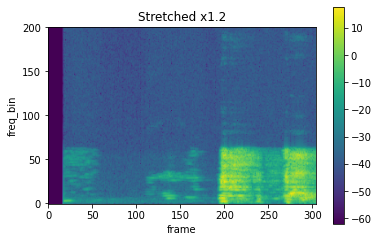

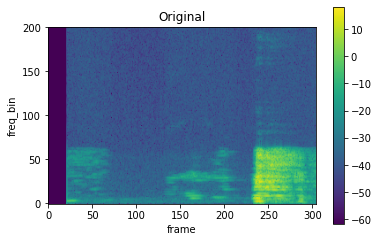

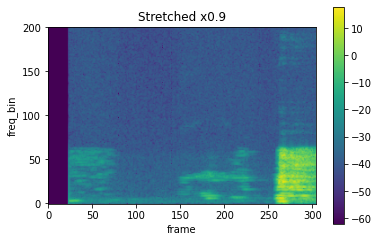

In [ ]:
#Time Stretch
spec = get_spectrogram(power=None)
stretch = T.TimeStretch()

rate = 1.2
spec_ = stretch(spec, rate)
plot_spectrogram(torch.abs(spec_[0]), title=f"Stretched x{rate}", aspect='equal', xmax=304)

plot_spectrogram(torch.abs(spec[0]), title="Original", aspect='equal', xmax=304)

rate = 0.9
spec_ = stretch(spec, rate)
plot_spectrogram(torch.abs(spec_[0]), title=f"Stretched x{rate}", aspect='equal', xmax=304)

In [ ]:
aug_extracted_features

NameError: ignored

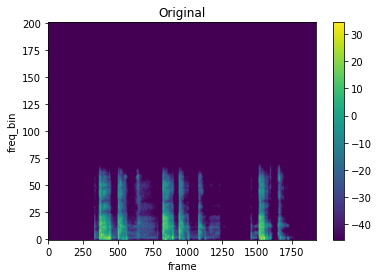

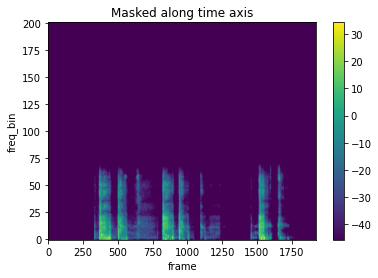

In [ ]:
#Time Masking
torch.random.manual_seed(4)

spec = get_spectrogram()
plot_spectrogram(spec[0], title="Original")

masking = T.TimeMasking(time_mask_param=80)
spec = masking(spec)

plot_spectrogram(spec[0], title="Masked along time axis")

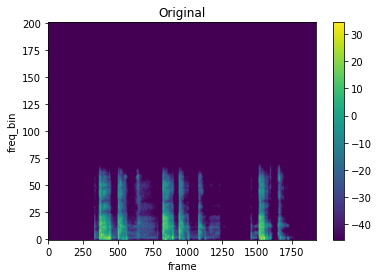

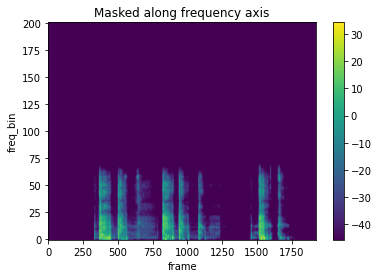

In [ ]:
#frequency Masking

torch.random.manual_seed(4)

spec = get_spectrogram()
plot_spectrogram(spec[0], title="Original")

masking = T.FrequencyMasking(freq_mask_param=80)
spec = masking(spec)

plot_spectrogram(spec[0], title="Masked along frequency axis")

In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
Y = np.array(extracted_features_df['class'].tolist())
y=[]
for i in range(1321):
  if extracted_features_df['class'][i] == 'healthy':
    y.append('0')
  else:
    y.append('1')
#y=extracted_features_df['class']

In [ ]:
y

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [ ]:
X.shape

(1321, 40)

In [ ]:
y_cnn=np.array(pd.get_dummies(Y))

In [ ]:
y_cnn.shape

(1321, 2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# ML MODELS

# Logistic Regression


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8679245283018868


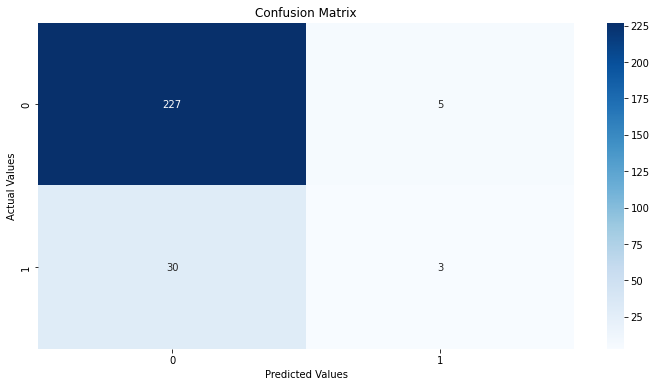

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       232
           1       0.38      0.09      0.15        33

    accuracy                           0.87       265
   macro avg       0.63      0.53      0.54       265
weighted avg       0.82      0.87      0.83       265



# SVM


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.8754716981132076


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       232
           1       0.00      0.00      0.00        33

    accuracy                           0.88       265
   macro avg       0.44      0.50      0.47       265
weighted avg       0.77      0.88      0.82       265



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8754716981132076


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       232
           1       0.00      0.00      0.00        33

    accuracy                           0.88       265
   macro avg       0.44      0.50      0.47       265
weighted avg       0.77      0.88      0.82       265



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MLP/Decision Tree

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [ ]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.89


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       232
           1       0.70      0.21      0.33        33

    accuracy                           0.89       265
   macro avg       0.80      0.60      0.63       265
weighted avg       0.87      0.89      0.86       265



# Deep Learning

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cnn,X_test_cnn,y_train_cnn,y_test_cnn=train_test_split(X,y_cnn,test_size=0.2,random_state=0)

In [ ]:
X_test_cnn.shape

(265, 40)

In [ ]:
y_test_cnn.shape

(265, 2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels=y_cnn.shape[1]
num_labels

2

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                1312      
                                                                 
 activation_8 (Activation)   (None, 32)                0         
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 2)                

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trainingg the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train_cnn, y_train_cnn, batch_size=num_batch_size, epochs=num_epochs,
          validation_data=(X_test_cnn, y_test_cnn), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
27/33 [=======================>......] - ETA: 0s - loss: 13.5518 - accuracy: 0.7627 
Epoch 1: val_loss improved from inf to 7.82086, saving model to saved_models/audio_classification.hdf5
33/33 [==============================] - 1s 9ms/step - loss: 12.5897 - accuracy: 0.7812 - val_loss: 7.8209 - val_accuracy: 0.8755
Epoch 2/100
30/33 [==========================>...] - ETA: 0s - loss: 8.6515 - accuracy: 0.8177 
Epoch 2: val_loss improved from 7.82086 to 4.62929, saving model to saved_models/audio_classification.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 8.3887 - accuracy: 0.8163 - val_loss: 4.6293 - val_accuracy: 0.8755
Epoch 3/100
22/33 [===================>..........] - ETA: 0s - loss: 6.6952 - accuracy: 0.8054
Epoch 3: val_loss did not improve from 4.62929
33/33 [==============================] - 0s 4ms/step - loss: 6.1539 - accuracy: 0.8210 - val_loss: 4.7189 - val_accuracy: 0.8755
Epoch 4/100
27/33 [=======================>......] - ETA: 0s - loss

In [ ]:
test_loss, test_accuracy=model.evaluate(X_test_cnn,y_test_cnn,verbose=0)
print(" test acc is ",test_accuracy)

 test acc is  0.8754717111587524


In [ ]:
y_pred_cnn = model.predict(X_test_cnn)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test_cnn, axis=1), np.argmax(y_pred_cnn, axis=1)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       232
           1       0.00      0.00      0.00        33

    accuracy                           0.88       265
   macro avg       0.44      0.50      0.47       265
weighted avg       0.77      0.88      0.82       265



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
